# Lomb Scargle on TIC_1403938

In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
from scipy.fft import fftfreq
from scipy.fft import fft
import numpy as np
from astropy.timeseries import LombScargle
import scipy
%matplotlib inline
from astropy.io import ascii

In [2]:
file = ascii.read("residual_TIC_1403938.csv")

In [3]:
print(file[0])

       time           flux          flux_err             residuals      
------------------ ---------- -------------------- ---------------------
1518.7504701241069 0.97606468 0.033343016127210995 -0.004294110716917581


In [4]:
time = file["time"]
flux = file["flux"]
residuals = file["residuals"]

print(time)

       time       
------------------
1518.7504701241069
 1518.751859046871
1518.7532479691702
1518.7546368914702
 1518.756025814235
1518.7574147365342
1518.7588036588334
1518.7601925815984
1518.7615815038978
1518.7629704266626
               ...
1518.9351967885061
  1518.93658571034
1518.9379746326401
1518.9393635544732
1518.9407524767714
1518.9421413986058
 1518.943530320906
1518.9449192427385
1518.9463081650376
1518.9476970868714
1518.9490860091707
Length = 142 rows


In [5]:
#t_start = time[1518.8310276235154>0]
#t_end = time[1518.849083613405355<0]
#print(t_start)
#print(t_end)

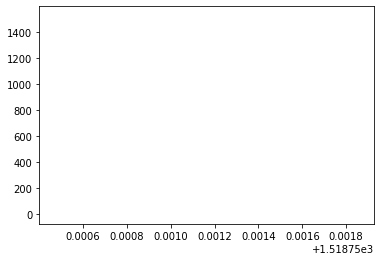

In [6]:
#solve this first

t_start = 1518.8310276235154
t_end = 1518.849083613405355

plt.axhspan(t_start,t_end)
ind = np.where (time > t_start) & (time < t_end)[0]

residual2 = residuals[ind]
time_2 = time[ind]

plt.plot(time_2,residual2)

In [7]:
#lomb_scargle = LombScargle(time, flux)

In [8]:
lomb_scargle = LombScargle(time, residuals)
lb_freq = lomb_scargle.autofrequency(nyquist_factor=1)
lb_power = lomb_scargle.power(lb_freq)

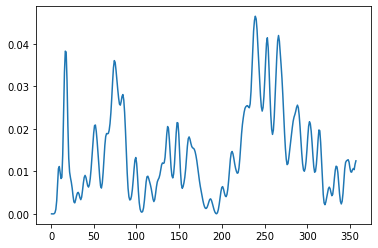

In [9]:
plt.plot(lb_freq, lb_power)

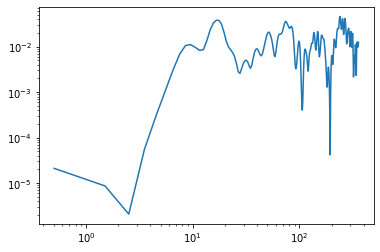

In [10]:
plt.loglog(lb_freq, lb_power)

Text(0, 0.5, 'power')

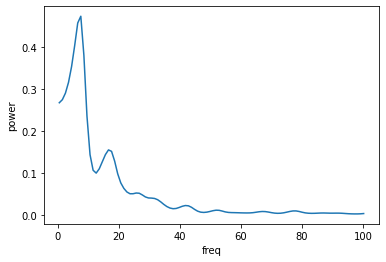

In [11]:
#frequency, power = LombScargle(time, residuals).autopower(maximum_frequency=100)
#plt.plot(frequency,np.abs(power))
#plt.xlabel("freq")
#plt.ylabel("power")


frequency, power = LombScargle(time, flux).autopower(maximum_frequency=100)
plt.plot(frequency,np.abs(power))
plt.xlabel("freq")
plt.ylabel("power")

Text(0, 0.5, 'power')

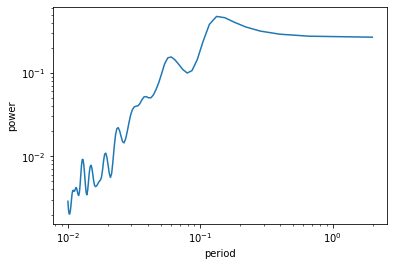

In [12]:
#LS in terms of period

plt.loglog(1/frequency,np.abs(power))

plt.xlabel("period")
plt.ylabel("power")

In [13]:
residuals = file["residuals"]

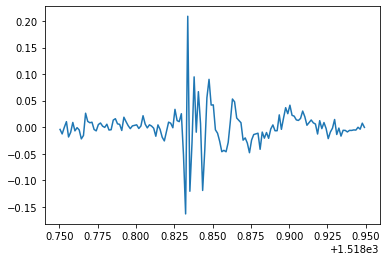

In [14]:
plt.plot(time,residuals)

In [15]:
#frequency, power = LombScargle(time, residuals).autopower()
#frequency, power = LombScargle(time, flux).autopower()

frequency, power = LombScargle(time, residuals).autopower(minimum_frequency=1,
                                                   maximum_frequency=100)
                                                   #samples_per_peak=10)


best_frequency = frequency[np.argmax(power)]
t_fit = time
ls = LombScargle(time, residuals)
y_fit = ls.model(t_fit, best_frequency)

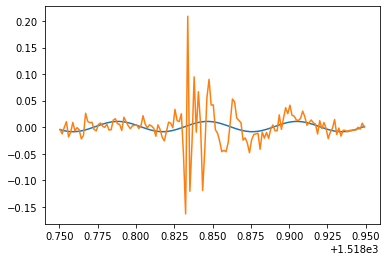

In [16]:
plt.plot(t_fit, y_fit)
plt.plot(time,residuals)

In [17]:
print(time)

       time       
------------------
1518.7504701241069
 1518.751859046871
1518.7532479691702
1518.7546368914702
 1518.756025814235
1518.7574147365342
1518.7588036588334
1518.7601925815984
1518.7615815038978
1518.7629704266626
               ...
1518.9351967885061
  1518.93658571034
1518.9379746326401
1518.9393635544732
1518.9407524767714
1518.9421413986058
 1518.943530320906
1518.9449192427385
1518.9463081650376
1518.9476970868714
1518.9490860091707
Length = 142 rows


In [18]:
file = ascii.read("residual_TIC_1403938_trunc.csv")

In [19]:
time = file["time"]
flux = file["flux"]
residuals = file["residuals"]

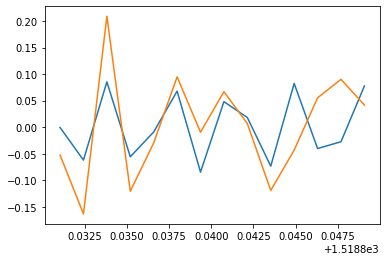

In [30]:
frequency, power = LombScargle(time, residuals).autopower(minimum_frequency=1,
                                                   maximum_frequency=400)
                                                   #samples_per_peak=10)


best_frequency = frequency[np.argmax(power)]
t_fit = time
ls = LombScargle(time, residuals)
y_fit = ls.model(t_fit, best_frequency)

plt.plot(t_fit, y_fit)
plt.plot(time,residuals)

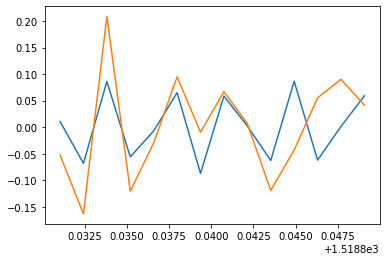

In [28]:
frequency,power = LombScargle(time, residuals).autopower()

best_frequency = frequency[np.argmax(power)]
t_fit = time
ls = LombScargle(time, residuals)
y_fit = ls.model(t_fit, best_frequency)

plt.plot(t_fit, y_fit)
plt.plot(time,residuals)

In [31]:
print(best_frequency)

266.8397589529623


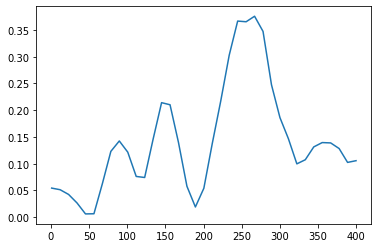

In [32]:
plt.plot(frequency,power)

Text(0, 0.5, 'power')

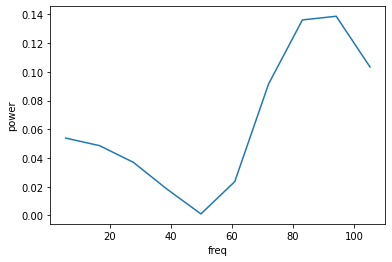

In [21]:
frequency, power = LombScargle(time, residuals).autopower(maximum_frequency=100)
plt.plot(frequency,np.abs(power))
plt.xlabel("freq")
plt.ylabel("power")